### 🔧 环境配置和检查

#### 概述

本教程需要特定的环境配置以确保最佳学习体验。以下配置将帮助您：

- 使用统一的conda环境：激活统一的学习环境
- 通过国内镜像源快速安装依赖：配置pip使用清华镜像源
- 加速模型下载：设置HuggingFace镜像代理
- 检查系统配置：检查硬件和软件配置

#### 配置

- **所需环境及其依赖已经部署好**
- 在`Notebook`右上角选择`jupyter内核`为`python(flyai_agent_in_action)`，即可执行下方代码

In [1]:
%%script bash

# 1. 激活 conda 环境 (仅对当前单元格有效)
eval "$(conda shell.bash hook)"
conda activate flyai_agent_in_action

echo "========================================="
echo "== Conda 环境检查报告 (仅针对当前 Bash 子进程) =="
echo "========================================="

# 2. 检查当前激活的环境
CURRENT_ENV_NAME=$(basename $CONDA_PREFIX)

if [ "$CURRENT_ENV_NAME" = "flyai_agent_in_action" ]; then
    echo "✅ 当前单元格已成功激活到 flyai_agent_in_action 环境。"
    echo "✅ 正在使用的环境路径: $CONDA_PREFIX"
    echo ""
    echo "💡 提示: 后续的 Python 单元格将使用 Notebook 当前选择的 Jupyter 内核。"
    echo "   如果需要后续单元格也使用此环境，请执行以下操作:"
    echo "   1. 检查 Notebook 右上角是否已选择 'python(flyai_agent_in_action)'。"
else
    echo "❌ 激活失败或环境名称不匹配。当前环境: $CURRENT_ENV_NAME"
    echo ""
    echo "⚠️ 严重提示: 建议将 Notebook 的 Jupyter **内核 (Kernel)** 切换为 'python(flyai_agent_in_action)'。"
    echo "   (通常位于 Notebook 右上角或 '内核' 菜单中)"
    echo ""
    echo "📚 备用方法 (不推荐): 如果无法切换内核，则必须在**每个**代码单元格的头部重复以下命令:"
    echo ""
    echo "%%script bash"
    echo "# 必须在每个单元格都执行"
    echo "eval \"\$(conda shell.bash hook)\""
    echo "conda activate flyai_agent_in_action"
fi

echo "=========================================" 

== Conda 环境检查报告 (仅针对当前 Bash 子进程) ==
✅ 当前单元格已成功激活到 flyai_agent_in_action 环境。
✅ 正在使用的环境路径: /workspace/envs/flyai_agent_in_action

💡 提示: 后续的 Python 单元格将使用 Notebook 当前选择的 Jupyter 内核。
   如果需要后续单元格也使用此环境，请执行以下操作:
   1. 检查 Notebook 右上角是否已选择 'python(flyai_agent_in_action)'。


In [2]:
# 2. 设置pip 为清华源
%pip config set global.index-url https://pypi.tuna.tsinghua.edu.cn/simple
%pip config list


Writing to /root/.config/pip/pip.conf
Note: you may need to restart the kernel to use updated packages.
global.index-url='https://pypi.tuna.tsinghua.edu.cn/simple'
:env:.target=''
Note: you may need to restart the kernel to use updated packages.


In [3]:
# 3. 设置HuggingFace代理
%env HF_ENDPOINT=https://hf-mirror.com
# 验证：使用shell命令检查
!echo $HF_ENDPOINT

env: HF_ENDPOINT=https://hf-mirror.com
https://hf-mirror.com


In [4]:
# 🔍 环境信息检查脚本
#
# 本脚本的作用：
# 1. 安装 pandas 库用于数据表格展示
# 2. 检查系统的各项配置信息
# 3. 生成详细的环境报告表格
#
# 对于初学者来说，这个步骤帮助您：
# - 了解当前运行环境的硬件配置
# - 确认是否满足模型运行的最低要求
# - 学习如何通过代码获取系统信息

# 安装 pandas 库 - 用于创建和展示数据表格
# pandas 是 Python 中最流行的数据处理和分析库
%pip install pandas==2.2.2 tabulate==0.9.0

import platform # 导入 platform 模块以获取系统信息
import os # 导入 os 模块以与操作系统交互
import subprocess # 导入 subprocess 模块以运行外部命令
import pandas as pd # 导入 pandas 模块，通常用于数据处理，这里用于创建表格
import shutil # 导入 shutil 模块以获取磁盘空间信息

# 获取 CPU 信息的函数，包括核心数量
def get_cpu_info():
    cpu_info = "" # 初始化 CPU 信息字符串
    physical_cores = "N/A"
    logical_cores = "N/A"

    if platform.system() == "Windows": # 如果是 Windows 系统
        cpu_info = platform.processor() # 使用 platform.processor() 获取 CPU 信息
        try:
            # 获取 Windows 上的核心数量 (需要 WMI)
            import wmi
            c = wmi.WMI()
            for proc in c.Win32_Processor():
                physical_cores = proc.NumberOfCores
                logical_cores = proc.NumberOfLogicalProcessors
        except:
            pass # 如果 WMI 不可用，忽略错误

    elif platform.system() == "Darwin": # 如果是 macOS 系统
        # 在 macOS 上使用 sysctl 命令获取 CPU 信息和核心数量
        os.environ['PATH'] = os.environ['PATH'] + os.pathsep + '/usr/sbin' # 更新 PATH 环境变量
        try:
            process_brand = subprocess.Popen(['sysctl', "machdep.cpu.brand_string"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_brand, stderr_brand = process_brand.communicate()
            cpu_info = stdout_brand.decode().split(': ')[1].strip() if stdout_brand else "Could not retrieve CPU info"

            process_physical = subprocess.Popen(['sysctl', "hw.physicalcpu"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_physical, stderr_physical = process_physical.communicate()
            physical_cores = stdout_physical.decode().split(': ')[1].strip() if stdout_physical else "N/A"

            process_logical = subprocess.Popen(['sysctl', "hw.logicalcpu"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout_logical, stderr_logical = process_logical.communicate()
            logical_cores = stdout_logical.decode().split(': ')[1].strip() if stdout_logical else "N/A"

        except:
            cpu_info = "Could not retrieve CPU info"
            physical_cores = "N/A"
            logical_cores = "N/A"

    else:  # Linux 系统
        try:
            # 在 Linux 上读取 /proc/cpuinfo 文件获取 CPU 信息和核心数量
            with open('/proc/cpuinfo') as f:
                physical_cores_count = 0
                logical_cores_count = 0
                cpu_info_lines = []
                for line in f:
                    if line.startswith('model name'): # 查找以 'model name'开头的行
                        if not cpu_info: # 只获取第一个 model name
                            cpu_info = line.split(': ')[1].strip()
                    elif line.startswith('cpu cores'): # 查找以 'cpu cores' 开头的行
                        physical_cores_count = int(line.split(': ')[1].strip())
                    elif line.startswith('processor'): # 查找以 'processor' 开头的行
                        logical_cores_count += 1
                physical_cores = str(physical_cores_count) if physical_cores_count > 0 else "N/A"
                logical_cores = str(logical_cores_count) if logical_cores_count > 0 else "N/A"
                if not cpu_info:
                     cpu_info = "Could not retrieve CPU info"

        except:
            cpu_info = "Could not retrieve CPU info"
            physical_cores = "N/A"
            logical_cores = "N/A"

    return f"{cpu_info} ({physical_cores} physical cores, {logical_cores} logical cores)" # 返回 CPU 信息和核心数量


# 获取内存信息的函数
def get_memory_info():
    mem_info = "" # 初始化内存信息字符串
    if platform.system() == "Windows":
        # 在 Windows 上不容易通过标准库获取，需要外部库或 PowerShell
        mem_info = "Requires external tools on Windows" # 设置提示信息
    elif platform.system() == "Darwin": # 如果是 macOS 系统
        # 在 macOS 上使用 sysctl 命令获取内存大小
        process = subprocess.Popen(['sysctl', "hw.memsize"], stdout=subprocess.PIPE, stderr=subprocess.PIPE) # 运行 sysctl 命令
        stdout, stderr = process.communicate() # 获取标准输出和标准错误
        mem_bytes = int(stdout.decode().split(': ')[1].strip()) # 解析输出，获取内存大小（字节）
        mem_gb = mem_bytes / (1024**3) # 转换为 GB
        mem_info = f"{mem_gb:.2f} GB" # 格式化输出
    else:  # Linux 系统
        try:
            # 在 Linux 上读取 /proc/meminfo 文件获取内存信息
            with open('/proc/meminfo') as f:
                total_mem_kb = 0
                available_mem_kb = 0
                for line in f:
                    if line.startswith('MemTotal'): # 查找以 'MemTotal' 开头的行
                        total_mem_kb = int(line.split(':')[1].strip().split()[0]) # 解析行，获取总内存（KB）
                    elif line.startswith('MemAvailable'): # 查找以 'MemAvailable' 开头的行
                         available_mem_kb = int(line.split(':')[1].strip().split()[0]) # 解析行，获取可用内存（KB）

                if total_mem_kb > 0:
                    total_mem_gb = total_mem_kb / (1024**2) # 转换为 GB
                    mem_info = f"{total_mem_gb:.2f} GB" # 格式化输出总内存
                    if available_mem_kb > 0:
                        available_mem_gb = available_mem_kb / (1024**2)
                        mem_info += f" (Available: {available_mem_gb:.2f} GB)" # 添加可用内存信息
                else:
                     mem_info = "Could not retrieve memory info" # 如果读取文件出错，设置错误信息

        except:
            mem_info = "Could not retrieve memory info" # 如果读取文件出错，设置错误信息
    return mem_info # 返回内存信息

# 获取 GPU 信息的函数，包括显存
def get_gpu_info():
    try:
        # 尝试使用 nvidia-smi 获取 NVIDIA GPU 信息和显存
        result = subprocess.run(['nvidia-smi', '--query-gpu=name,memory.total', '--format=csv,noheader'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            gpu_lines = result.stdout.strip().split('\n') # 解析输出，获取 GPU 名称和显存
            gpu_info_list = []
            for line in gpu_lines:
                name, memory = line.split(', ')
                gpu_info_list.append(f"{name} ({memory})") # 格式化 GPU 信息
            return ", ".join(gpu_info_list) if gpu_info_list else "NVIDIA GPU found, but info not listed" # 返回 GPU 信息或提示信息
        else:
             # 尝试使用 lshw 获取其他 GPU 信息 (需要安装 lshw)
            try:
                result_lshw = subprocess.run(['lshw', '-C', 'display'], capture_output=True, text=True)
                if result_lshw.returncode == 0: # 如果命令成功执行
                     # 简单解析输出中的 product 名称和显存
                    gpu_info_lines = []
                    current_gpu = {}
                    for line in result_lshw.stdout.splitlines():
                        if 'product:' in line:
                             if current_gpu:
                                 gpu_info_lines.append(f"{current_gpu.get('product', 'GPU')} ({current_gpu.get('memory', 'N/A')})")
                             current_gpu = {'product': line.split('product:')[1].strip()}
                        elif 'size:' in line and 'memory' in line:
                             current_gpu['memory'] = line.split('size:')[1].strip()

                    if current_gpu: # 添加最后一个 GPU 的信息
                        gpu_info_lines.append(f"{current_gpu.get('product', 'GPU')} ({current_gpu.get('memory', 'N/A')})")

                    return ", ".join(gpu_info_lines) if gpu_info_lines else "GPU found (via lshw), but info not parsed" # 如果找到 GPU 但信息无法解析，设置提示信息
                else:
                    return "No GPU found (checked nvidia-smi and lshw)" # 如果两个命令都找不到 GPU，设置提示信息
            except FileNotFoundError:
                 return "No GPU found (checked nvidia-smi, lshw not found)" # 如果找不到 lshw 命令，设置提示信息
    except FileNotFoundError:
        return "No GPU found (nvidia-smi not found)" # 如果找不到 nvidia-smi 命令，设置提示信息


# 获取 CUDA 版本的函数
def get_cuda_version():
    try:
        # 尝试使用 nvcc --version 获取 CUDA 版本
        result = subprocess.run(['nvcc', '--version'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            for line in result.stdout.splitlines():
                if 'release' in line: # 查找包含 'release' 的行
                    return line.split('release ')[1].split(',')[0] # 解析行，提取版本号
        return "CUDA not found or version not parsed" # 如果找不到 CUDA 或版本无法解析，设置提示信息
    except FileNotFoundError:
        return "CUDA not found" # 如果找不到 nvcc 命令，设置提示信息

# 获取 Python 版本的函数
def get_python_version():
    return platform.python_version() # 获取 Python 版本

# 获取 Conda 版本的函数
def get_conda_version():
    try:
        # 尝试使用 conda --version 获取 Conda 版本
        result = subprocess.run(['conda', '--version'], capture_output=True, text=True)
        if result.returncode == 0: # 如果命令成功执行
            return result.stdout.strip() # 返回 Conda 版本
        return "Conda not found or version not parsed" # 如果找不到 Conda 或版本无法解析，设置提示信息
    except FileNotFoundError:
        return "Conda not found" # 如果找不到 conda 命令，设置提示信息

# 获取物理磁盘空间信息的函数
def get_disk_space():
    try:
        total, used, free = shutil.disk_usage("/") # 获取根目录的磁盘使用情况
        total_gb = total / (1024**3) # 转换为 GB
        used_gb = used / (1024**3) # 转换为 GB
        free_gb = free / (1024**3) # 转换为 GB
        return f"Total: {total_gb:.2f} GB, Used: {used_gb:.2f} GB, Free: {free_gb:.2f} GB" # 格式化输出
    except Exception as e:
        return f"Could not retrieve disk info: {e}" # 如果获取信息出错，设置错误信息

# 获取环境信息
os_name = platform.system() # 获取操作系统名称
os_version = platform.release() # 获取操作系统版本
if os_name == "Linux":
    try:
        # 在 Linux 上尝试获取发行版和版本
        lsb_info = subprocess.run(['lsb_release', '-a'], capture_output=True, text=True)
        if lsb_info.returncode == 0: # 如果命令成功执行
            for line in lsb_info.stdout.splitlines():
                if 'Description:' in line: # 查找包含 'Description:' 的行
                    os_version = line.split('Description:')[1].strip() # 提取描述信息作为版本
                    break # 找到后退出循环
                elif 'Release:' in line: # 查找包含 'Release:' 的行
                     os_version = line.split('Release:')[1].strip() # 提取版本号
                     # 尝试获取 codename
                     try:
                         codename_info = subprocess.run(['lsb_release', '-c'], capture_output=True, text=True)
                         if codename_info.returncode == 0:
                             os_version += f" ({codename_info.stdout.split(':')[1].strip()})" # 将 codename 添加到版本信息中
                     except:
                         pass # 如果获取 codename 失败则忽略

    except FileNotFoundError:
        pass # lsb_release 可能未安装，忽略错误

full_os_info = f"{os_name} {os_version}" # 组合完整的操作系统信息
cpu_info = get_cpu_info() # 调用函数获取 CPU 信息和核心数量
memory_info = get_memory_info() # 调用函数获取内存信息
gpu_info = get_gpu_info() # 调用函数获取 GPU 信息和显存
cuda_version = get_cuda_version() # 调用函数获取 CUDA 版本
python_version = get_python_version() # 调用函数获取 Python 版本
conda_version = get_conda_version() # 调用函数获取 Conda 版本
disk_info = get_disk_space() # 调用函数获取物理磁盘空间信息


# 创建用于存储数据的字典
env_data = {
    "项目": [ # 项目名称列表
        "操作系统",
        "CPU 信息",
        "内存信息",
        "GPU 信息",
        "CUDA 信息",
        "Python 版本",
        "Conda 版本",
        "物理磁盘空间" # 添加物理磁盘空间
    ],
    "信息": [ # 对应的信息列表
        full_os_info,
        cpu_info,
        memory_info,
        gpu_info,
        cuda_version,
        python_version,
        conda_version,
        disk_info # 添加物理磁盘空间信息
    ]
}

# 创建一个 pandas DataFrame
df = pd.DataFrame(env_data)

# 打印表格
print("### 环境信息") # 打印标题
print(df.to_markdown(index=False)) # 将 DataFrame 转换为 Markdown 格式并打印，不包含索引


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
### 环境信息
| 项目         | 信息                                                                  |
|:-------------|:----------------------------------------------------------------------|
| 操作系统     | Linux 5.15.0-126-generic                                              |
| CPU 信息     | Intel(R) Xeon(R) Platinum 8468 (48 physical cores, 192 logical cores) |
| 内存信息     | 2015.36 GB (Available: 1867.11 GB)                                    |
| GPU 信息     | No GPU found (checked nvidia-smi, lshw not found)                     |
| CUDA 信息    | 12.6                                                                  |
| Python 版本  | 3.12.11                                                               |
| Conda 版本   | conda 25.7.0                                                          |
| 物理磁盘空间 | Total: 2014.78 GB, Used: 787.32 GB, Free: 1125.04 GB                  |


# 研究助理（Research Assistant）

## 回顾

本节将用到 LangGraph 的几个核心主题：

- 记忆（Memory）
- 人机协同（Human-in-the-loop）
- 可控性（Controllability）

现在，我们把这些理念整合起来，构建一个非常常见且实用的 AI 应用：研究自动化。

传统研究通常由分析师承担，工作繁琐、耗时。AI 在这方面有很大助力空间。

但研究环节需要强定制化：直接使用大模型原始输出，往往不适合真实的决策流程。

基于 AI 的定制化「研究与报告生成」工作流，是一个可行且有前景的方向（参考：[Reports over RAG](https://jxnl.co/writing/2024/06/05/predictions-for-the-future-of-rag/#reports-over-rag)）。

## 目标

构建一个围绕聊天模型的「轻量级多智能体」系统，用于定制化研究流程。

`数据源选择（Source Selection）`
- 用户可以自由选择任意研究输入源。

`规划（Planning）`
- 用户给出主题，系统生成一支 AI 分析师团队，每位分析师负责一个子主题。
- 在研究开始前，通过「人机协同」来微调/确认这些子主题。

`大模型使用（LLM Utilization）`
- 每位分析师会基于所选数据源，与专家型 AI 进行深入「访谈」。
- 访谈为多轮对话，旨在抽取更具体、更有洞见的信息（类似于 [STORM](https://arxiv.org/abs/2402.14207) 论文中的做法）。
- 这些访谈将使用带有内部状态的 `子图（sub-graphs）` 来承载与追踪。

`研究过程（Research Process）`
- 专家会并行收集信息以回答分析师的问题（`parallel`）。
- 所有访谈将通过 `map-reduce` 同步进行与汇总。

`输出格式（Output Format）`
- 将每次访谈中得到的洞见进行综合，产出最终报告。
- 报告使用可定制提示词，便于灵活调整输出格式。

![Screenshot 2024-08-26 at 7.26.33 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbb164d61c93d48e604091_research-assistant1.png)

In [5]:
%%capture --no-stderr
# 安装项目所需的Python包
# 使用 %%capture --no-stderr 来隐藏安装过程中的输出信息，保持notebook整洁
# %pip install --quiet -U langgraph langchain_openai langchain_community langchain_core tavily-python wikipedia
%pip install --quiet langgraph==0.6.7 langchain_openai==0.3.32 langchain_community==0.3.29 langchain_core==0.3.75 tavily-python==0.7.12 wikipedia==1.4.0

# 包说明：
# - langgraph: LangGraph框架，用于构建多智能体工作流
# - langchain_openai: LangChain的OpenAI集成，用于调用GPT模型
# - langchain_community: LangChain社区工具集，包含各种第三方集成
# - langchain_core: LangChain核心组件，提供基础功能
# - tavily-python: Tavily搜索API客户端，用于网络搜索
# - wikipedia: 维基百科API客户端，用于获取维基百科内容

## 环境准备（Setup）

In [6]:
import os, getpass

def _set_env(var: str):
    """
    安全设置环境变量的辅助函数

    参数:
        var (str): 环境变量名称

    功能:
        - 检查环境变量是否已存在
        - 如果不存在，则通过getpass安全地获取用户输入
        - 将用户输入设置为环境变量值
    """
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

# 设置 OpenAI API 密钥
# 这是使用 OpenAI 模型所必需的，用于身份验证
_set_env("OPENAI_API_KEY")

# 设置 OpenAI API代理地址 (例如：https://api.apiyi.com/v1）
# 用于配置API请求的基础URL，支持使用代理服务
_set_env("OPENAI_BASE_URL")

OPENAI_API_KEY:  ········
OPENAI_BASE_URL:  ········


In [7]:
from langchain_openai import ChatOpenAI

# 初始化OpenAI聊天模型
# 使用GPT-4o模型，这是OpenAI最新的多模态大语言模型
# temperature=0 确保输出结果具有确定性和一致性，适合需要稳定输出的场景
llm = ChatOpenAI(model="gpt-4o", temperature=0)

我们将使用 [LangSmith](https://docs.smith.langchain.com/) 进行[链路追踪（tracing）](https://docs.smith.langchain.com/concepts/tracing)，便于调试与分析。

In [8]:
# 设置LangSmith追踪配置
# LangSmith是LangChain的官方监控和调试平台
_set_env("LANGSMITH_API_KEY")  # 设置LangSmith API密钥
os.environ["LANGSMITH_TRACING"] = "true"  # 启用链路追踪功能
os.environ["LANGSMITH_PROJECT"] = "FlyAIBox" # 设置项目名称，用于组织追踪数据

LANGSMITH_API_KEY:  ········


## 分析师：人机协同（Human-In-The-Loop）

通过人机协同的方式生成并审核分析师角色。

In [9]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

class Analyst(BaseModel):
    """
    分析师数据模型

    用于定义每个AI分析师的基本信息和角色特征
    每个分析师代表一个特定的研究视角和专长领域
    """
    affiliation: str = Field(
        description="分析师的主要隶属机构或组织",
    )
    name: str = Field(
        description="分析师姓名"
    )
    role: str = Field(
        description="分析师在研究主题中的具体角色定位",
    )
    description: str = Field(
        description="分析师的关注焦点、关切点和动机的详细描述",
    )

    @property
    def persona(self) -> str:
        """
        生成分析师人设描述

        返回:
            str: 格式化的分析师人设信息，用于后续的AI对话中
        """
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"

class Perspectives(BaseModel):
    """
    分析师集合数据模型

    用于存储和管理多个分析师的信息
    支持结构化输出，确保AI生成的分析师信息格式正确
    """
    analysts: List[Analyst] = Field(
        description="包含所有分析师角色和隶属机构的综合列表",
    )

class GenerateAnalystsState(TypedDict):
    """
    分析师生成状态管理

    用于在LangGraph工作流中管理分析师生成过程的状态信息
    """
    topic: str  # 研究主题
    max_analysts: int  # 分析师数量上限
    human_analyst_feedback: str  # 人类反馈信息，用于人机协同调整
    analysts: List[Analyst]  # 生成的分析师列表

图可视化：


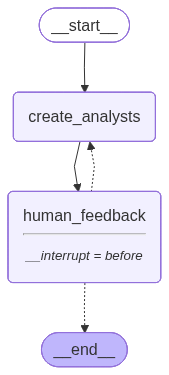

✅ 图渲染成功！


In [10]:
from IPython.display import Image, display
from langgraph.graph import START, END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

# 分析师生成指令模板
# 这个提示词指导AI如何根据研究主题创建合适的分析师团队
analyst_instructions="""你需要创建一组 AI 分析师人设。请严格遵循以下指引：

1. 先审阅研究主题：
{topic}

2. 查看（可选的）编辑反馈，它将指导分析师的人设创建：

{human_analyst_feedback}

3. 基于上述文档与/或反馈，识别最值得关注的主题。

4. 选出前 {max_analysts} 个主题。

5. 为每个主题分配一位分析师。"""

def create_analysts(state: GenerateAnalystsState):
    """
    创建分析师人设的核心函数

    功能:
        1. 根据研究主题和人类反馈生成分析师团队
        2. 使用结构化输出确保生成的分析师信息格式正确
        3. 将生成的分析师信息存储到状态中

    参数:
        state: 包含研究主题、分析师数量限制和人类反馈的状态对象

    返回:
        dict: 包含生成的分析师列表的字典
    """
    # 从状态中提取必要信息
    topic = state['topic']
    max_analysts = state['max_analysts']
    human_analyst_feedback = state.get('human_analyst_feedback', '')

    # 配置结构化输出，确保返回Perspectives格式的数据
    structured_llm = llm.with_structured_output(Perspectives)

    # 构建系统消息，包含研究主题、反馈和数量限制
    system_message = analyst_instructions.format(
        topic=topic,
        human_analyst_feedback=human_analyst_feedback,
        max_analysts=max_analysts
    )

    # 调用大模型生成分析师集合
    analysts = structured_llm.invoke([
        SystemMessage(content=system_message),
        HumanMessage(content="生成分析师集合。")
    ])

    # 将分析师列表写入状态，供后续节点使用
    return {"analysts": analysts.analysts}

def human_feedback(state: GenerateAnalystsState):
    """
    人机协同中断点节点

    功能:
        - 作为工作流的中断点，允许人类审查和修改生成的分析师
        - 这是一个空操作节点，主要用于流程控制
        - 人类可以在此节点提供反馈，系统会根据反馈重新生成分析师

    参数:
        state: 当前状态对象
    """
    pass

def should_continue(state: GenerateAnalystsState):
    """
    条件路由函数：决定工作流的下一步执行

    功能:
        - 检查是否有人类反馈
        - 如果有反馈，重新生成分析师
        - 如果没有反馈，结束流程

    参数:
        state: 当前状态对象

    返回:
        str: 下一个要执行的节点名称
    """
    # 检查是否有人类反馈
    human_analyst_feedback = state.get('human_analyst_feedback', None)
    if human_analyst_feedback:
        return "create_analysts"  # 有反馈，重新生成分析师

    # 没有反馈，结束流程
    return END

# 构建LangGraph工作流
builder = StateGraph(GenerateAnalystsState)

# 添加节点到工作流
builder.add_node("create_analysts", create_analysts)  # 分析师生成节点
builder.add_node("human_feedback", human_feedback)    # 人类反馈节点

# 添加边连接节点
builder.add_edge(START, "create_analysts")  # 开始 -> 生成分析师
builder.add_edge("create_analysts", "human_feedback")  # 生成分析师 -> 人类反馈

# 添加条件边：根据是否有反馈决定下一步
builder.add_conditional_edges(
    "human_feedback",
    should_continue,
    ["create_analysts", END]
)

# 编译工作流
memory = MemorySaver()  # 使用内存检查点保存状态
graph = builder.compile(
    interrupt_before=['human_feedback'],  # 在人类反馈节点前中断
    checkpointer=memory
)

# 展示图结构
# 图可视化
print("图可视化：")

# 方案1：尝试使用 Pyppeteer 本地渲染（推荐）
try:
    # 可视化：通过 Mermaid 渲染图结构
    display(Image(graph.get_graph(xray=1).draw_mermaid_png()))
    print("✅ 图渲染成功！")
except Exception as e:
    print(f"❌ Pyppeteer 渲染失败: {e}")
    
    # 方案2：显示 Mermaid 文本格式
    print("\n📝 图结构（Mermaid 文本格式）：")
    print("=" * 50)
    mermaid_text = graph.get_graph().draw_mermaid()
    print(mermaid_text)
    print("=" * 50)
    
    # 方案3：显示图的节点和边信息
    print("\n🔗 图结构信息：")
    print("节点:", list(graph.get_graph().nodes.keys()))
    print("边:", list(graph.get_graph().edges))
    
    # 方案4：提供手动渲染说明
    print("\n💡 手动渲染说明：")
    print("1. 复制上面的 Mermaid 文本")
    print("2. 访问 https://mermaid.live/")
    print("3. 粘贴文本到编辑器中查看图形")
    print("4. 或者使用支持 Mermaid 的 Markdown 编辑器")

![image-20250930152238678](https://cdn.jsdelivr.net/gh/Fly0905/note-picture@main/imag/202509301522726.png)

In [11]:
# Input
max_analysts = 3
topic = "采用LangGraph作为AI Agent框架的好处"
thread = {"configurable": {"thread_id": "1"}}

# Run the graph until the first interruption
for event in graph.stream({"topic":topic,"max_analysts":max_analysts,}, thread, stream_mode="values"):
    # Review
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)

Failed to multipart ingest runs: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


Name: John Smith
Affiliation: AI Systems Research Lab
Role: AI架构师
Description: John专注于AI框架的架构设计和性能优化。他对LangGraph的模块化设计和可扩展性有深入研究，认为这些特性能够显著提升AI系统的开发效率和灵活性。
--------------------------------------------------
Name: Maria Garcia
Affiliation: Data Security Institute
Role: 数据安全专家
Description: Maria关注AI系统的安全性和隐私保护。她研究LangGraph如何通过其内置的安全协议和数据加密机制来增强AI应用的安全性。
--------------------------------------------------
Name: Li Wei
Affiliation: Human-AI Interaction Center
Role: 人机交互研究员
Description: Li Wei致力于研究人机交互和用户体验。他认为LangGraph的直观接口和用户友好性能够改善开发者和用户的交互体验。
--------------------------------------------------


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTP

In [12]:
# Get state and look at next node
state = graph.get_state(thread)
state.next

('human_feedback',)

In [13]:
# We now update the state as if we are the human_feedback node
graph.update_state(thread, {"human_analyst_feedback":
      "加入一位来自初创公司的人，以增加创业者的视角"}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f09e782-787f-6d0b-8002-e552fde025a3'}}

In [14]:
# Continue the graph execution
for event in graph.stream(None, thread, stream_mode="values"):
    # Review
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)

Name: John Smith
Affiliation: AI Systems Research Lab
Role: AI架构师
Description: John专注于AI框架的架构设计和性能优化。他对LangGraph的模块化设计和可扩展性有深入研究，认为这些特性能够显著提升AI系统的开发效率和灵活性。
--------------------------------------------------
Name: Maria Garcia
Affiliation: Data Security Institute
Role: 数据安全专家
Description: Maria关注AI系统的安全性和隐私保护。她研究LangGraph如何通过其内置的安全协议和数据加密机制来增强AI应用的安全性。
--------------------------------------------------
Name: Li Wei
Affiliation: Human-AI Interaction Center
Role: 人机交互研究员
Description: Li Wei致力于研究人机交互和用户体验。他认为LangGraph的直观接口和用户友好性能够改善开发者和用户的交互体验。
--------------------------------------------------
Name: John Smith
Affiliation: Tech Research Institute
Role: Technical Analyst
Description: John specializes in the technical architecture and integration of AI frameworks. He focuses on how LangGraph can enhance system interoperability and scalability, making it easier for developers to build complex AI systems.
--------------------------------------------------
Name: Emily Chen
Affiliation: Startup

In [15]:
# 如果我们满意，那么我们就简单地不提供反馈
further_feedack = None
graph.update_state(thread, {"human_analyst_feedback":
                            further_feedack}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f09e782-91f0-6428-8004-544f498ef3a0'}}

In [16]:
# Continue the graph execution to end
for event in graph.stream(None, thread, stream_mode="updates"):
    print("--Node--")
    node_name = next(iter(event.keys()))
    print(node_name)

In [17]:
final_state = graph.get_state(thread)
analysts = final_state.values.get('analysts')

In [18]:
final_state.next

()

In [19]:
for analyst in analysts:
    print(f"Name: {analyst.name}")
    print(f"Affiliation: {analyst.affiliation}")
    print(f"Role: {analyst.role}")
    print(f"Description: {analyst.description}")
    print("-" * 50)

Name: John Smith
Affiliation: Tech Research Institute
Role: Technical Analyst
Description: John specializes in the technical architecture and integration of AI frameworks. He focuses on how LangGraph can enhance system interoperability and scalability, making it easier for developers to build complex AI systems.
--------------------------------------------------
Name: Emily Chen
Affiliation: Startup Innovators Hub
Role: Entrepreneurial Analyst
Description: Emily brings a fresh perspective from the startup world, emphasizing the entrepreneurial benefits of using LangGraph. She explores how this framework can reduce development time and costs, allowing startups to quickly iterate and bring AI products to market.
--------------------------------------------------
Name: Dr. Ahmed Khan
Affiliation: AI Ethics and Society Center
Role: Ethical Analyst
Description: Dr. Ahmed is an expert in AI ethics and societal impact. He examines how LangGraph can be used to ensure ethical AI development, fo

## 进行访谈（Conduct Interview）

### 生成问题（Generate Question）

分析师将向专家提出问题。

In [20]:
import operator
from typing import Annotated
from langgraph.graph import MessagesState

class InterviewState(MessagesState):
    """
    访谈状态管理类

    继承自MessagesState，用于管理分析师与专家之间的对话状态
    包含访谈过程中的所有必要信息和上下文
    """
    max_num_turns: int  # 对话轮次上限，控制访谈深度
    context: Annotated[list, operator.add]  # 检索到的源文档列表，使用operator.add进行累加
    analyst: Analyst  # 当前进行访谈的分析师对象
    interview: str  # 完整的访谈记录文本
    sections: list  # 访谈摘要小节列表，用于最终报告生成

class SearchQuery(BaseModel):
    """
    搜索查询数据模型

    用于结构化生成搜索查询，确保搜索请求格式正确
    """
    search_query: str = Field(None, description="用于检索的搜索查询语句")

In [21]:
# 问题生成指令模板
# 指导AI分析师如何与专家进行有效的访谈对话
question_instructions = """你是一名分析师，需要通过访谈专家来了解一个具体主题。

你的目标是提炼与该主题相关的「有趣且具体」的洞见。

1. 有趣（Interesting）：让人感到意外或非显而易见的观点。

2. 具体（Specific）：避免泛泛而谈，包含专家提供的具体案例或细节。

以下是你的关注主题与目标设定：{goals}

请先用符合你人设的名字进行自我介绍，然后提出你的第一个问题。

持续追问，逐步深入，逐步完善你对该主题的理解。

当你认为信息已充分，请以这句话结束访谈：「非常感谢您的帮助!」

请始终保持与你的人设与目标一致的说话方式。"""

def generate_question(state: InterviewState):
    """
    生成访谈问题的核心函数

    功能:
        1. 根据分析师的人设和当前对话历史生成下一个问题
        2. 确保问题符合分析师的关注点和角色定位
        3. 维护对话的连贯性和深度

    参数:
        state: 包含分析师信息和对话历史的状态对象

    返回:
        dict: 包含新生成问题的消息列表
    """
    # 从状态中获取分析师信息和当前对话历史
    analyst = state["analyst"]
    messages = state["messages"]

    # 构建系统消息，包含分析师的人设信息
    system_message = question_instructions.format(goals=analyst.persona)

    # 调用大模型生成下一个问题
    question = llm.invoke([SystemMessage(content=system_message)] + messages)

    # 将生成的问题添加到消息历史中
    return {"messages": [question]}

### 生成回答：并行化（Parallelization）

专家将并行地从多个来源收集信息来回答问题。

例如，我们可以使用：

- 具体网站（例如通过 [`WebBaseLoader`](https://python.langchain.com/v0.2/docs/integrations/document_loaders/web_base/) 抓取）
- 已建立索引的文档（例如基于 [RAG](https://python.langchain.com/v0.2/docs/tutorials/rag/) 的检索）
- Web 搜索
- 维基百科搜索

你也可以尝试不同的 Web 搜索工具，比如 [Tavily](https://tavily.com/)。

In [22]:
def _set_env(var: str):
    """
    安全设置环境变量的辅助函数（重复定义，保持代码完整性）
    """
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

# 设置Tavily搜索API密钥
# Tavily是一个专门为AI应用优化的搜索API，提供高质量的搜索结果
_set_env("TAVILY_API_KEY")

TAVILY_API_KEY:  ········


In [23]:
# 网络搜索工具配置
from langchain_community.tools.tavily_search import TavilySearchResults

# 初始化Tavily搜索工具
# max_results=3 限制每次搜索返回的结果数量，平衡信息丰富度和处理效率
tavily_search = TavilySearchResults(max_results=3)

/workspace/tmp/ipykernel_1684/1003905209.py:6: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults(max_results=3)


In [24]:
# 维基百科搜索工具配置
from baike_loader import BaiduBaikeLoader

接下来，我们将创建用于 Web 与维基百科检索的节点。

还会创建一个用于回答分析师问题的节点。

最后，创建用于保存完整访谈内容，以及撰写访谈摘要（“section”）的节点。

图可视化：


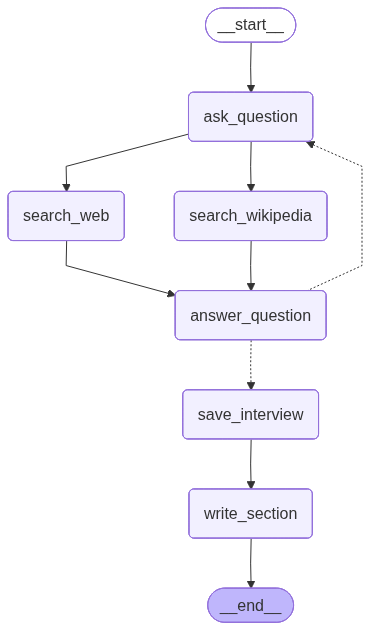

✅ 图渲染成功！


In [25]:
from langchain_core.messages import get_buffer_string

# 搜索查询生成指令
# 指导AI如何从对话中提取有效的搜索查询
search_instructions = SystemMessage(content=f"""你将获得一段分析师与专家之间的对话。

你的目标是基于这段对话，为Web搜索生成一条结构良好的查询语句。

首先，通读整段对话。

特别关注分析师最后提出的问题。

将这个最终问题转化为结构良好的 Web 搜索查询。""")

def search_web(state: InterviewState):
    """
    通过Web搜索检索相关文档

    功能:
        1. 分析当前对话内容，生成合适的搜索查询
        2. 使用Tavily API执行网络搜索
        3. 格式化搜索结果，便于后续处理

    参数:
        state: 包含对话历史的状态对象

    返回:
        dict: 包含格式化搜索结果的上下文信息
    """
    # 使用结构化输出生成搜索查询
    structured_llm = llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([search_instructions] + state['messages'])

    # 执行Tavily网络搜索
    search_docs = tavily_search.invoke(search_query.search_query)

    # 格式化搜索结果，添加来源信息
    formatted_search_docs = "\n\n---\n\n".join([
        f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
        for doc in search_docs
    ])

    return {"context": [formatted_search_docs]}

def search_wikipedia(state: InterviewState):
    """
    通过维基百科检索相关文档

    功能:
        1. 分析当前对话内容，生成维基百科搜索查询
        2. 使用WikipediaLoader获取维基百科内容
        3. 格式化搜索结果，便于后续处理

    参数:
        state: 包含对话历史的状态对象

    返回:
        dict: 包含格式化维基百科搜索结果的上下文信息
    """
    # 使用结构化输出生成搜索查询
    structured_llm = llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([search_instructions] + state['messages'])

    # 执行维基百科搜索，限制最多2个文档
    search_docs = BaiduBaikeLoader(
        query=search_query.search_query,
        load_max_docs=2
    ).load()

    # 格式化维基百科搜索结果
    formatted_search_docs = "\n\n---\n\n".join([
        f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
        for doc in search_docs
    ])

    return {"context": [formatted_search_docs]}

# 专家回答指令模板
# 指导AI专家如何基于检索到的信息回答分析师的问题
answer_instructions = """你是一位被分析师访谈的专家。

以下是分析师的关注领域：{goals}。

你的目标是回答访谈者提出的问题。

回答问题时，请仅使用以下上下文：

{context}

回答须遵循如下要求：

1. 只使用上下文中提供的信息。

2. 不要引入上下文之外的信息，也不要做未在上下文明确说明的假设。

3. 上下文在每段文档顶部包含来源信息。

4. 在涉及具体论断时，请在相应内容旁标注引用来源编号。例如，针对来源 1 使用 [1]。

5. 在答案结尾处按顺序列出引用来源，如：[1] Source 1, [2] Source 2 等。

6. 若来源形如：<Document source="assistant/docs/llama3_1.pdf" page="7"/>，则在引用列表中只写：

[1] assistant/docs/llama3_1.pdf, page 7

并且不要再重复加中括号，也不要附加 Document source 前缀。"""

def generate_answer(state: InterviewState):
    """
    生成专家回答的核心函数

    功能:
        1. 基于检索到的上下文信息回答分析师的问题
        2. 确保回答符合专家的角色定位
        3. 提供准确的引用和来源信息

    参数:
        state: 包含分析师信息、对话历史和检索上下文的状态对象

    返回:
        dict: 包含专家回答的消息列表
    """
    # 从状态中获取必要信息
    analyst = state["analyst"]
    messages = state["messages"]
    context = state["context"]

    # 构建系统消息，包含分析师关注点和检索上下文
    system_message = answer_instructions.format(
        goals=analyst.persona,
        context=context
    )

    # 调用大模型生成专家回答
    answer = llm.invoke([SystemMessage(content=system_message)] + messages)

    # 标记该消息来自专家，便于后续路由
    answer.name = "expert"

    # 将专家回答添加到消息历史中
    return {"messages": [answer]}

def save_interview(state: InterviewState):
    """
    保存访谈内容的函数

    功能:
        1. 将完整的对话历史转换为文本格式
        2. 保存访谈记录，供后续报告生成使用

    参数:
        state: 包含对话历史的状态对象

    返回:
        dict: 包含完整访谈记录的字典
    """
    # 获取所有对话消息
    messages = state["messages"]

    # 将消息列表转换为格式化的字符串
    interview = get_buffer_string(messages)

    # 将访谈记录保存到状态中
    return {"interview": interview}

def route_messages(state: InterviewState, name: str = "expert"):
    """
    消息路由函数：决定访谈流程的下一步

    功能:
        1. 检查是否达到最大对话轮次
        2. 检查分析师是否表示访谈结束
        3. 决定是继续提问还是保存访谈

    参数:
        state: 当前访谈状态
        name: 专家消息的标识符，默认为"expert"

    返回:
        str: 下一个要执行的节点名称
    """
    # 获取对话消息和最大轮次设置
    messages = state["messages"]
    max_num_turns = state.get('max_num_turns', 2)

    # 统计专家回答次数
    num_responses = len([
        m for m in messages
        if isinstance(m, AIMessage) and m.name == name
    ])

    # 如果达到最大轮次，结束访谈
    if num_responses >= max_num_turns:
        return 'save_interview'

    # 检查上一个问题是否表明对话结束
    # 注意：这里假设倒数第二个消息是分析师的问题
    last_question = messages[-2]

    if "非常感谢您的帮助!" in last_question.content:
        return 'save_interview'

    # 继续提问
    return "ask_question"

# 报告小节写作指令模板
# 指导AI如何将访谈内容转换为结构化的报告小节
section_writer_instructions = """你是一名资深技术写作者。

你的任务是基于一组来源文档，撰写一段简洁、易读的报告小节。

1. 先分析来源文档内容：
- 每个文档的名称在文档开头，以 <Document 标签呈现。

2. 使用 Markdown 制作小节结构：
- 用 ## 作为小节标题
- 用 ### 作为小节内的小标题

3. 按结构撰写：
 a. 标题（## 头）
 b. 摘要（### 头）
 c. 参考来源（### 头）

4. 标题需要贴合分析师的关注点并具有吸引力：
{focus}

5. 关于摘要部分：
- 先给出与分析师关注点相关的背景/上下文
- 强调访谈中获得的新颖、有趣或令人意外的洞见
- 使用到来源文档时，按使用顺序创建编号
- 不要提及访谈者或专家的名字
- 控制在约 400 字以内
- 在报告正文中使用数字引用（如 [1]、[2]），基于来源文档信息

6. 在参考来源部分：
- 列出报告中使用到的全部来源
- 给出完整链接或具体文档路径
- 每个来源单独一行；在行尾加两个空格以产生 Markdown 换行
- 参考格式：

### Sources
[1] 链接或文档名
[2] 链接或文档名

7. 合并重复来源。例如以下是不正确的：

[3] https://ai.meta.com/blog/meta-llama-3-1/
[4] https://ai.meta.com/blog/meta-llama-3-1/

应去重为：

[3] https://ai.meta.com/blog/meta-llama-3-1/

8. 最终检查：
- 确保报告结构符合要求
- 标题前不要有任何前言
- 检查是否遵循了全部规范"""

def write_section(state: InterviewState):
    """
    生成报告小节的核心函数

    功能:
        1. 基于访谈内容和检索到的文档生成结构化的报告小节
        2. 确保小节内容符合分析师的专业关注点
        3. 提供准确的引用和来源信息

    参数:
        state: 包含访谈记录、检索上下文和分析师信息的状态对象

    返回:
        dict: 包含生成的小节内容的字典
    """
    # 从状态中获取必要信息
    interview = state["interview"]
    context = state["context"]
    analyst = state["analyst"]

    # 构建系统消息，包含分析师的关注点描述
    system_message = section_writer_instructions.format(focus=analyst.description)

    # 调用大模型生成报告小节
    section = llm.invoke([
        SystemMessage(content=system_message),
        HumanMessage(content=f"使用这个来源来撰写你的小节: {context}")
    ])

    # 将生成的小节添加到状态中
    return {"sections": [section.content]}

# 构建访谈工作流
interview_builder = StateGraph(InterviewState)

# 添加各个功能节点
interview_builder.add_node("ask_question", generate_question)      # 生成问题节点
interview_builder.add_node("search_web", search_web)              # 网络搜索节点
interview_builder.add_node("search_wikipedia", search_wikipedia)  # 维基百科搜索节点
interview_builder.add_node("answer_question", generate_answer)    # 生成回答节点
interview_builder.add_node("save_interview", save_interview)      # 保存访谈节点
interview_builder.add_node("write_section", write_section)        # 撰写小节节点

# 定义工作流连接关系
interview_builder.add_edge(START, "ask_question")  # 开始 -> 提问
interview_builder.add_edge("ask_question", "search_web")  # 提问 -> 网络搜索
interview_builder.add_edge("ask_question", "search_wikipedia")  # 提问 -> 维基百科搜索
interview_builder.add_edge("search_web", "answer_question")  # 网络搜索 -> 回答
interview_builder.add_edge("search_wikipedia", "answer_question")  # 维基百科搜索 -> 回答

# 条件边：根据对话状态决定下一步
interview_builder.add_conditional_edges(
    "answer_question",
    route_messages,
    ['ask_question', 'save_interview']
)

interview_builder.add_edge("save_interview", "write_section")  # 保存访谈 -> 撰写小节
interview_builder.add_edge("write_section", END)  # 撰写小节 -> 结束

# 编译访谈工作流
memory = MemorySaver()
interview_graph = interview_builder.compile(checkpointer=memory).with_config(run_name="Conduct Interviews")


# 图可视化
print("图可视化：")

# 方案1：尝试使用 Pyppeteer 本地渲染（推荐）
try:
    # 可视化：通过 Mermaid 渲染图结构
    display(Image(interview_graph.get_graph().draw_mermaid_png()))
    print("✅ 图渲染成功！")
except Exception as e:
    print(f"❌ Pyppeteer 渲染失败: {e}")
    
    # 方案2：显示 Mermaid 文本格式
    print("\n📝 图结构（Mermaid 文本格式）：")
    print("=" * 50)
    mermaid_text = interview_graph.get_graph().draw_mermaid()
    print(mermaid_text)
    print("=" * 50)
    
    # 方案3：显示图的节点和边信息
    print("\n🔗 图结构信息：")
    print("节点:", list(interview_graph.get_graph().nodes.keys()))
    print("边:", list(interview_graph.get_graph().edges))
    
    # 方案4：提供手动渲染说明
    print("\n💡 手动渲染说明：")
    print("1. 复制上面的 Mermaid 文本")
    print("2. 访问 https://mermaid.live/")
    print("3. 粘贴文本到编辑器中查看图形")
    print("4. 或者使用支持 Mermaid 的 Markdown 编辑器")

![image-20250930152452478](https://cdn.jsdelivr.net/gh/Fly0905/note-picture@main/imag/202509301524600.png)

In [26]:
# Pick one analyst
analysts[0]

Analyst(affiliation='Tech Research Institute', name='John Smith', role='Technical Analyst', description='John specializes in the technical architecture and integration of AI frameworks. He focuses on how LangGraph can enhance system interoperability and scalability, making it easier for developers to build complex AI systems.')

此处我们运行一次访谈，并传入与主题相关的 llama3.1 论文索引作为参考。

In [27]:
!curl https://en.wikipedia.org/w/rest.php/v1/page/Earth

curl: (35) error:0A000126:SSL routines::unexpected eof while reading


In [28]:
from IPython.display import Markdown
messages = [HumanMessage(f"所以你说你在写一篇关于{topic}的文章?")]
thread = {"configurable": {"thread_id": "1"}}
interview = interview_graph.invoke({"analyst": analysts[0], "messages": messages, "max_num_turns": 2}, thread)
Markdown(interview['sections'][0])

## Enhancing AI System Interoperability and Scalability with LangGraph

### Summary

LangGraph, an open-source AI agent framework developed by LangChain, is revolutionizing the way developers build, deploy, and manage complex generative AI agent workflows. By leveraging graph-based architectures, LangGraph provides a robust platform for creating scalable and efficient large language models (LLMs) [1]. This architecture allows for the modeling of intricate relationships between various components of an AI agent workflow, enhancing decision-making capabilities through a process known as reflection, where AI agents analyze past actions and feedback [1].

One of the standout features of LangGraph is its ability to scale AI workflows without compromising efficiency, making it an ideal choice for businesses looking to expand their AI capabilities swiftly and seamlessly [2]. The framework's interoperability ensures that it can be integrated with existing AI technologies, allowing organizations to enhance their current systems without significant reconfiguration [2]. This flexibility is crucial for businesses that need to adapt to changing market demands quickly.

LangGraph also supports the development of agent-based systems, which are applicable in diverse fields such as robotics, autonomous vehicles, and video games [1]. The framework's modular design allows multiple agents to work together within a single workflow, sharing state and coordinating decisions to create more reliable and adaptable systems [3]. This capability is particularly beneficial for enterprise workflows that require cross-functional support and risk evaluations.

However, developers should consider the complexity of their applications before adopting LangGraph, as its advanced features may introduce unnecessary overhead for simpler use cases [4]. For straightforward applications, a simpler approach might be more appropriate, avoiding the complexity of defining graphs and managing state [4].

### Sources
[1] https://www.ibm.com/think/topics/langgraph  
[2] https://www.rapidinnovation.io/post/ai-agents-in-langgraph  
[3] https://www.ema.co/additional-blogs/addition-blogs/building-ai-agents-langgraph  
[4] https://medium.com/@ken_lin/langgraph-a-framework-for-building-stateful-multi-agent-llm-applications-a51d5eb68d03  

### 并行访谈：Map-Reduce

我们通过 `Send()` API 并行运行每个访谈（map 步）。

随后在 reduce 步中将它们合并为报告主体。

### 收尾（Finalize）

最后增加一步，为最终报告写出引言与结论。

In [29]:
import operator
from typing import List, Annotated
from typing_extensions import TypedDict

class ResearchGraphState(TypedDict):
    """
    研究图状态管理类

    用于管理整个研究流程的状态信息，包括分析师生成、并行访谈和报告生成
    这是整个研究助理系统的核心状态管理类
    """
    topic: str  # 研究主题
    max_analysts: int  # 分析师数量上限
    human_analyst_feedback: str  # 人类反馈信息
    analysts: List[Analyst]  # 分析师列表
    sections: Annotated[list, operator.add]  # 报告小节列表，使用operator.add进行累加
    introduction: str  # 最终报告的引言部分
    content: str  # 最终报告的主体内容
    conclusion: str  # 最终报告的结论部分
    final_report: str  # 完整的最终报告

/workspace/tmp/ipykernel_1684/1311232654.py:1: LangGraphDeprecatedSinceV10: Importing Send from langgraph.constants is deprecated. Please use 'from langgraph.types import Send' instead. Deprecated in LangGraph V1.0 to be removed in V2.0.
  from langgraph.constants import Send


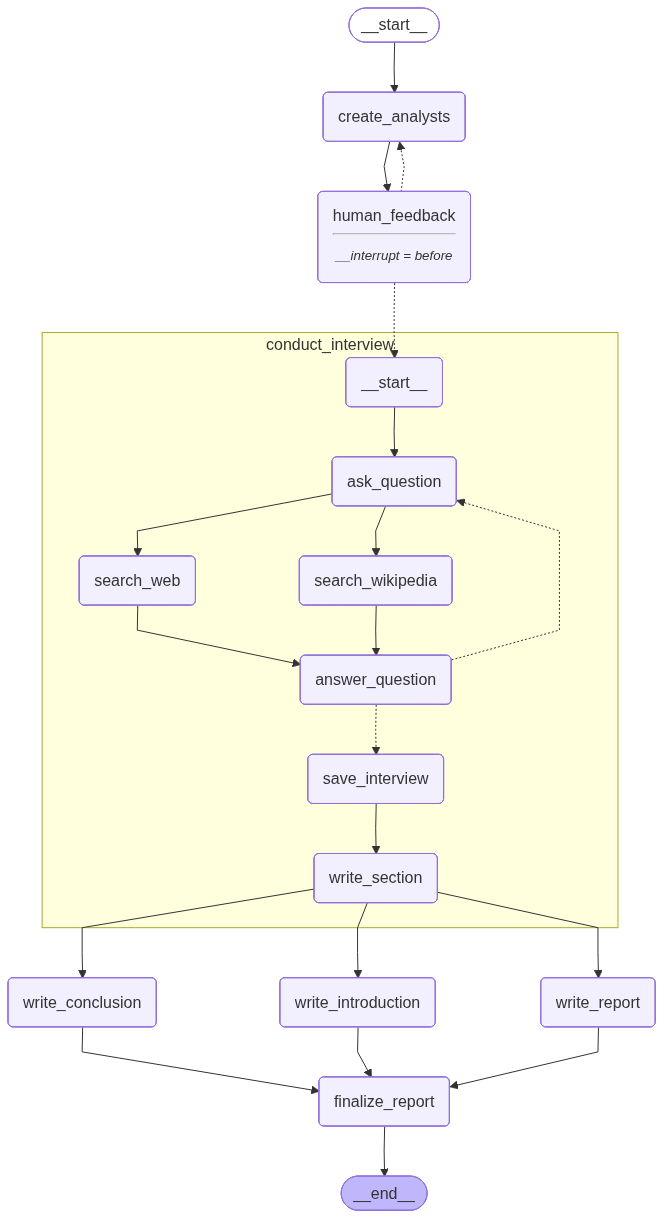

In [30]:
from langgraph.constants import Send

def initiate_all_interviews(state: ResearchGraphState):
    """
    启动所有并行访谈的Map步骤

    功能:
        1. 检查是否有人类反馈，如果有则重新生成分析师
        2. 如果没有反馈，则并行启动所有分析师的访谈流程
        3. 使用Send API实现真正的并行执行

    参数:
        state: 包含分析师列表和研究主题的状态对象

    返回:
        str 或 List[Send]: 如果有人类反馈返回节点名，否则返回Send对象列表
    """
    # 检查是否有人类反馈
    human_analyst_feedback = state.get('human_analyst_feedback')
    if human_analyst_feedback:
        # 有人类反馈，重新生成分析师
        return "create_analysts"

    # 没有反馈，并行启动所有访谈
    else:
        topic = state["topic"]
        # 为每个分析师创建一个Send对象，实现并行执行
        return [
            Send("conduct_interview", {
                "analyst": analyst,
                "messages": [HumanMessage(
                    content=f"So you said you were writing an article on {topic}?"
                )]
            })
            for analyst in state["analysts"]
        ]

# 报告写作指令模板
# 指导AI如何将多个分析师的小节整合为统一的报告主体
report_writer_instructions = """你是一名技术写作者，正在为如下主题撰写报告：

{topic}

你拥有一支分析师团队。每位分析师完成了两件事：

1. 围绕一个具体子主题，访谈了一位专家。
2. 将发现写成一份备忘录（memo）。

你的任务：

1. 你将收到分析师们的备忘录集合。
2. 仔细思考每份备忘录的洞见。
3. 将它们整合为简洁的总体总结，串联起所有备忘录的中心观点。
4. 把每份备忘录的关键信息归纳成一个连贯的单一叙述。

报告格式要求：

1. 使用 Markdown 格式。
2. 报告不要有任何前言。
3. 不使用任何小标题。
4. 报告以一个标题开头：## Insights
5. 报告中不要提及任何分析师的名字。
6. 保留备忘录中的引用标注（如 [1]、[2]）。
7. 汇总最终来源列表，并以 `## Sources` 作为小节标题。
8. 按顺序列出来源且不要重复。

[1] Source 1
[2] Source 2

以下是分析师提供的备忘录，请基于此撰写报告：

{context}"""

def write_report(state: ResearchGraphState):
    """
    生成最终报告主体内容的函数（Reduce步骤）

    功能:
        1. 收集所有分析师的小节内容
        2. 将多个小节整合为统一的报告主体
        3. 确保报告结构清晰、内容连贯

    参数:
        state: 包含所有小节内容和研究主题的状态对象

    返回:
        dict: 包含报告主体内容的字典
    """
    # 获取所有小节内容和研究主题
    sections = state["sections"]
    topic = state["topic"]

    # 将所有小节拼接为完整文本
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])

    # 构建系统消息，包含研究主题和小节内容
    system_message = report_writer_instructions.format(
        topic=topic,
        context=formatted_str_sections
    )

    # 调用大模型生成报告主体
    report = llm.invoke([
        SystemMessage(content=system_message),
        HumanMessage(content=f"Write a report based upon these memos.")
    ])

    return {"content": report.content}

# 引言和结论写作指令模板
# 指导AI如何为报告生成简洁有力的引言和结论
intro_conclusion_instructions = """你是一名技术写作者，正在完成主题为 {topic} 的报告。

你将获得报告的全部小节。

你的任务是撰写简洁而有说服力的引言或结论。

由用户告知写引言还是结论。

两者均不需要任何前言。

目标约 100 字：
- 引言：精炼预览各小节要点
- 结论：精炼回顾各小节要点

使用 Markdown 格式。

生成的报告使用中文，所有内容都要使用中文，对于特殊的英文术语，可以使用中英文一起表示。

引言要求：创建一个有吸引力的标题，并用 # 作为标题头。

引言小节标题使用：## Introduction

结论小节标题使用：## Conclusion

撰写时可参考以下小节内容：{formatted_str_sections}"""

def write_introduction(state: ResearchGraphState):
    """
    生成报告引言的函数

    功能:
        1. 基于所有小节内容生成报告引言
        2. 提供报告的整体概览和吸引力
        3. 为读者提供阅读指导

    参数:
        state: 包含所有小节内容和研究主题的状态对象

    返回:
        dict: 包含引言内容的字典
    """
    # 获取所有小节内容和研究主题
    sections = state["sections"]
    topic = state["topic"]

    # 将所有小节拼接为完整文本
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])

    # 构建指令，包含研究主题和小节内容
    instructions = intro_conclusion_instructions.format(
        topic=topic,
        formatted_str_sections=formatted_str_sections
    )

    # 调用大模型生成引言
    intro = llm.invoke([
        instructions,
        HumanMessage(content=f"Write the report introduction")
    ])

    return {"introduction": intro.content}

def write_conclusion(state: ResearchGraphState):
    """
    生成报告结论的函数

    功能:
        1. 基于所有小节内容生成报告结论
        2. 总结报告的主要发现和洞察
        3. 为读者提供清晰的总结

    参数:
        state: 包含所有小节内容和研究主题的状态对象

    返回:
        dict: 包含结论内容的字典
    """
    # 获取所有小节内容和研究主题
    sections = state["sections"]
    topic = state["topic"]

    # 将所有小节拼接为完整文本
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])

    # 构建指令，包含研究主题和小节内容
    instructions = intro_conclusion_instructions.format(
        topic=topic,
        formatted_str_sections=formatted_str_sections
    )

    # 调用大模型生成结论
    conclusion = llm.invoke([
        instructions,
        HumanMessage(content=f"Write the report conclusion")
    ])

    return {"conclusion": conclusion.content}

def finalize_report(state: ResearchGraphState):
    """
    最终报告生成函数（Reduce步骤的最终阶段）

    功能:
        1. 整合引言、主体内容和结论
        2. 处理来源信息的格式
        3. 生成完整的最终报告

    参数:
        state: 包含引言、主体内容、结论和来源信息的状态对象

    返回:
        dict: 包含完整最终报告的字典
    """
    # 获取报告主体内容
    content = state["content"]

    # 清理内容格式，移除重复的标题
    if content.startswith("## Insights"):
        content = content.strip("## Insights")

    # 分离主体内容和来源信息
    if "## Sources" in content:
        try:
            content, sources = content.split("\n## Sources\n")
        except:
            sources = None
    else:
        sources = None

    # 组合完整的最终报告
    final_report = (
        state["introduction"] +
        "\n\n---\n\n" +
        content +
        "\n\n---\n\n" +
        state["conclusion"]
    )

    # 如果有来源信息，添加到报告末尾
    if sources is not None:
        final_report += "\n\n## Sources\n" + sources

    return {"final_report": final_report}

# 构建完整的研究图工作流
builder = StateGraph(ResearchGraphState)

# 添加所有功能节点
builder.add_node("create_analysts", create_analysts)  # 分析师生成节点
builder.add_node("human_feedback", human_feedback)    # 人类反馈节点
builder.add_node("conduct_interview", interview_builder.compile())  # 访谈子图节点
builder.add_node("write_report", write_report)        # 报告主体写作节点
builder.add_node("write_introduction", write_introduction)  # 引言写作节点
builder.add_node("write_conclusion", write_conclusion)      # 结论写作节点
builder.add_node("finalize_report", finalize_report)        # 最终报告生成节点

# 定义工作流连接关系
builder.add_edge(START, "create_analysts")  # 开始 -> 生成分析师
builder.add_edge("create_analysts", "human_feedback")  # 生成分析师 -> 人类反馈

# 条件边：根据是否有反馈决定下一步
builder.add_conditional_edges(
    "human_feedback",
    initiate_all_interviews,
    ["create_analysts", "conduct_interview"]
)

# 并行执行：访谈完成后同时进行报告写作、引言写作和结论写作
builder.add_edge("conduct_interview", "write_report")
builder.add_edge("conduct_interview", "write_introduction")
builder.add_edge("conduct_interview", "write_conclusion")

# 等待所有写作任务完成后，进行最终报告生成
builder.add_edge(
    ["write_conclusion", "write_report", "write_introduction"],
    "finalize_report"
)
builder.add_edge("finalize_report", END)  # 最终报告生成 -> 结束

# 编译完整的研究图工作流
memory = MemorySaver()
graph = builder.compile(
    interrupt_before=['human_feedback'],  # 在人类反馈节点前中断
    checkpointer=memory
)

# 显示完整的工作流图
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

我们来就 LangGraph 提一个开放式问题。

In [31]:
# 演示：运行研究助理系统
# 设置输入参数
max_analysts = 3  # 分析师数量
topic = "采用LangGraph作为AI Agent框架的好处"  # 研究主题
thread = {"configurable": {"thread_id": "1"}}  # 线程ID，用于状态管理

# 运行工作流直到第一个中断点（人类反馈节点）
for event in graph.stream({
    "topic": topic,
    "max_analysts": max_analysts
}, thread, stream_mode="values"):

    # 检查是否有分析师信息输出
    analysts = event.get('analysts', '')
    if analysts:
        # 显示生成的分析师信息
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)

Name: Dr. Emily Zhang
Affiliation: LangGraph Research Institute
Role: 技术分析师
Description: 专注于LangGraph框架的技术优势，特别是在提高AI Agent的可扩展性和模块化方面的贡献。
--------------------------------------------------
Name: Mr. John Doe
Affiliation: AI Systems Efficiency Group
Role: 性能分析师
Description: 研究LangGraph框架如何通过优化资源使用和提高处理效率来增强AI Agent的性能。
--------------------------------------------------
Name: Ms. Sarah Lee
Affiliation: Human-AI Interaction Lab
Role: 用户体验分析师
Description: 探讨LangGraph框架在促进AI Agent与用户之间的交互和用户体验方面的潜力。
--------------------------------------------------


In [32]:
# 模拟人类反馈：添加一个AI原生初创公司的CEO视角
# 这展示了人机协同（Human-in-the-loop）功能的使用
graph.update_state(thread, {
    "human_analyst_feedback": "添加一个AI原生初创公司的CEO"
}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f09e78a-88df-6ea6-8002-23fdffd78f3c'}}

In [33]:
# 检查更新后的分析师列表
# 系统会根据人类反馈重新生成分析师团队
for event in graph.stream(None, thread, stream_mode="values"):
    analysts = event.get('analysts', '')
    if analysts:
        # 显示更新后的分析师信息
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)

Name: Dr. Emily Zhang
Affiliation: LangGraph Research Institute
Role: 技术分析师
Description: 专注于LangGraph框架的技术优势，特别是在提高AI Agent的可扩展性和模块化方面的贡献。
--------------------------------------------------
Name: Mr. John Doe
Affiliation: AI Systems Efficiency Group
Role: 性能分析师
Description: 研究LangGraph框架如何通过优化资源使用和提高处理效率来增强AI Agent的性能。
--------------------------------------------------
Name: Ms. Sarah Lee
Affiliation: Human-AI Interaction Lab
Role: 用户体验分析师
Description: 探讨LangGraph框架在促进AI Agent与用户之间的交互和用户体验方面的潜力。
--------------------------------------------------
Name: Dr. Emily Chen
Affiliation: LangGraph AI Solutions
Role: AI技术专家
Description: 专注于LangGraph框架的技术优势，尤其是在数据处理和自然语言理解方面的能力。
--------------------------------------------------
Name: Michael Zhang
Affiliation: AI Native Innovations
Role: CEO
Description: 作为AI原生初创公司的CEO，关注LangGraph框架在商业应用中的潜力，尤其是其在快速开发和部署AI解决方案方面的优势。
--------------------------------------------------
Name: Prof. John Smith
Affiliation: Global AI Research Institute
Role: AI生态系统研究员

In [34]:
# 确认满意当前的分析师团队，继续执行后续流程
# 设置反馈为None表示没有进一步的修改需求
graph.update_state(thread, {
    "human_analyst_feedback": None
}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f09e78a-a295-68fa-8004-ed9d3d649ae3'}}

In [35]:
# 继续执行完整的研究流程
# 包括并行访谈、报告生成等所有后续步骤
for event in graph.stream(None, thread, stream_mode="updates"):
    print("--Node--")
    node_name = next(iter(event.keys()))
    print(node_name)

--Node--
conduct_interview
--Node--
conduct_interview
--Node--
conduct_interview
--Node--
write_introduction
--Node--
write_conclusion
--Node--
write_report
--Node--
finalize_report


In [36]:
from IPython.display import Markdown

# 获取最终状态并显示生成的报告
final_state = graph.get_state(thread)
report = final_state.values.get('final_report')

# 使用Markdown格式显示最终报告
Markdown(report)

# 采用LangGraph作为AI Agent框架的好处

## Introduction

在当今多样化的AI代理框架中，LangGraph以其卓越的性能和适应性脱颖而出。首先，LangGraph在数据处理和自然语言理解方面展现出显著优势，确保代理的状态和交互得以顺利执行。其次，其设计理念强调快速迭代和轻松扩展，使其成为开发和部署AI解决方案的理想选择。此外，LangGraph在跨平台集成和协作方面的独特能力，进一步推动了全球AI生态系统的发展。通过这些优势，LangGraph为企业提供了强大的工具集，助力其在AI领域实现创新和增长。

---



LangGraph emerges as a standout AI agent framework, particularly in handling complex, stateful workflows. Its design is tailored for enterprise-level operations, excelling in data processing and natural language understanding. The framework's built-in state management ensures smooth execution and data flow, while its loop graph functionality allows agents to revisit previous steps and adapt to changing conditions, offering granular control and continuous data management [1]. LangGraph's natural language processing capabilities enhance AI agents' understanding of user queries, leading to more accurate responses and improved customer satisfaction and engagement [3]. By leveraging structured data representation, AI agents can make informed decisions, optimizing organizational operations and reducing costs. LangGraph also supports integration with other platforms and APIs, enabling seamless communication with external systems and broadening application scope [3].

Compared to OpenAI Swarm, LangGraph provides greater control, making it more suitable for complex workflows, whereas OpenAI Swarm remains experimental and may not be ideal for production environments [1]. Its seamless integration with LangChain expands access to tools and models, enhancing natural language processing and understanding capabilities [1].

LangGraph is designed for rapid AI deployment and scalability, emphasizing quick iteration, immediate debugging, and easy expansion, making it an ideal choice for developing and deploying AI solutions [2]. Its infrastructure supports a range of applications from conversational agents to complex task automation, offering an "out-of-the-box" solution [1]. The framework's modular design and use of pre-trained models excel in understanding and generating natural language [3]. Successful commercial applications, such as Tradestack's public-facing agent system, demonstrate LangGraph's controlled agent architecture [4]. The state machine approach is considered key for future reliable AI agent architectures, making LangGraph a preferred choice for developers aiming to build robust, inspectable, and maintainable multi-agent systems [5]. LangGraph simplifies the agent user experience construction process through its integrated developer studio and opinionated API [1], making it a valuable framework for startups seeking rapid AI solution development and deployment.

Globally, LangGraph is recognized for its impact on the AI ecosystem, particularly in facilitating cross-platform integration and collaboration. Its flexible architecture supports seamless multi-platform integration, showcasing higher adaptability and integration capabilities compared to other AI agent frameworks like OpenAI Agent SDK, Google ADK, and AWS [1]. In the legal industry, LangGraph aids in designing multi-agent systems to accelerate workflows, demonstrating its effectiveness and innovation in real-world scenarios [2]. Building reliable agent systems requires ensuring LLMs have appropriate context at each step, necessitating precise input control and step execution to generate relevant content [3]. These insights highlight LangGraph's technical advantages and its crucial role in advancing cross-platform collaboration in AI systems.


---

## Conclusion

综上所述，LangGraph框架在AI代理领域展现出卓越的性能和广泛的应用潜力。通过其强大的数据处理和自然语言理解能力，LangGraph为企业级工作流提供了可靠的基础，确保了代理的状态管理和数据流动的顺畅。其循环图功能和与LangChain的无缝集成进一步增强了其在复杂工作流中的适应性和控制力。此外，LangGraph的快速迭代和扩展能力使其成为开发和部署AI解决方案的理想选择，尤其在跨平台集成和协作方面表现突出。无论是初创公司还是大型企业，LangGraph都为其提供了一个强大的工具集，推动了AI技术的创新和应用。

## Sources

[1] https://www.turing.com/resources/ai-agent-frameworks  
[2] https://www.ema.co/additional-blogs/addition-blogs/building-ai-agents-langgraph  
[3] https://www.rapidinnovation.io/post/ai-agents-in-langgraph  
[4] https://blog.langchain.com/top-5-langgraph-agents-in-production-2024/  
[5] https://medium.com/@vikaskumarsingh_60821/langgraph-the-future-of-production-grade-ai-agent-architectures-623d68dbbfb6  
[6] https://www.langchain.com/langgraph  
[7] https://www.ibm.com/think/topics/langgraph  
[8] https://medium.com/@roberto.g.infante/the-state-of-ai-agent-frameworks-comparing-langgraph-openai-agent-sdk-google-adk-and-aws-d3e52a497720  
[9] https://blog.langchain.com/customers-definely/  
[10] https://blog.langchain.com/how-to-think-about-agent-frameworks/

# LangSmith执行追踪

我们可以查看一次完整的执行追踪（trace），了解整个研究流程的详细执行情况：

`https://smith.langchain.com/public/2933a7bb-bcef-4d2d-9b85-cc735b22ca0c/r`

## 追踪内容说明

这个追踪链接展示了：

1. **分析师生成过程**：如何根据研究主题创建不同的分析师角色
2. **并行访谈执行**：多个分析师同时进行访谈的详细过程
3. **信息检索流程**：网络搜索和维基百科搜索的具体执行
4. **报告生成步骤**：从访谈内容到最终报告的完整转换过程
5. **人机协同交互**：人类反馈如何影响系统行为

通过这个追踪，你可以深入了解LangGraph工作流的内部执行机制和每个节点的具体功能。